<a href="https://colab.research.google.com/github/RaheemYusuf/Adigun500/blob/main/E_Com_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES DATA ANALYSIS (E-COMMERCE CASE STUDY.)**

We are analysis an e-commerce sales data.

The objectives of this analysis are:

1. What is the best month for sale?

# **Data Dictionary**

The dataset contains sales history of an e-commerces sales over a period of 12 months, combined togehter, we have 373,700 observations and 6 variables.
The variables are:
OrderID:- a unique number for each item ordered.

Product:- name of item ordered

Quantity Ordered:- the number of a particular item ordered.

Price Each:- Price or cost of each item.

Order Date:- Date a particular item was ordered

Purchase Address: The address was made or delivery address.

In [2]:
#Importing the neccessary library.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os #needed when dealing with filepath directory.

In [3]:
#Our files are individuals csv, so we are going to combine the files. 

os.listdir('/content/drive/MyDrive/Colab Notebooks/Ecom data')

['Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_November_2019.csv',
 'Sales_July_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv',
 'Sales_February_2019.csv',
 'Sales_June_2019.csv',
 'Sales_May_2019.csv',
 'Sales_December_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv']

In [4]:
#Saving the list into a variable

sales_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Ecom data')

sales_files


['Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_November_2019.csv',
 'Sales_July_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv',
 'Sales_February_2019.csv',
 'Sales_June_2019.csv',
 'Sales_May_2019.csv',
 'Sales_December_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv']

In [5]:
#To get out each files, first I will iterate over each and append it. 

#buidling the iterator

for file in sales_files:
  print(file)

Sales_March_2019.csv
Sales_August_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv
Sales_December_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv


In [6]:
#Now I will read each files and also combine them to a single file

sales_files_path = '/content/drive/MyDrive/Colab Notebooks/Ecom data'
all_data=pd.DataFrame()

for file in sales_files:
  current_df=pd.read_csv(sales_files_path+'/'+file) #combining the filepath and file name together
  all_data=pd.concat([all_data,current_df])

all_data.shape #To get the data shape

(186850, 6)

In [7]:
#Converting the result we have to csv

all_data.to_csv(sales_files_path+'/all_data.csv',index=False)

In [8]:
#previewing the first 5 rows of the dataframe

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


## **Data Cleaning**

In [9]:
#checking if the data has missing value

all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
#Dropping duplicates

all_data=all_data.dropna(how='all')

In [11]:
#Checking the shape

all_data.shape

(186305, 6)

# **Data Analysis**






## What is the best Month for sales.

In [12]:
#We need to define a function to extract our Month from the order date.

def month(x):
  return x.split('/')[0]

In [13]:
#applying the function and storing it in a new variable

all_data['month']=all_data['Order Date'].apply(month)

In [14]:
#Checking out the new variable

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [15]:
#Checking the datatype of the entire dataframe

all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [16]:
#Changing the datatype of month to int

all_data['month']=all_data['month'].astype(int)

ValueError: ignored

In [17]:
#We need to check the unique value of of the month variable

all_data['month'].unique()

array(['03', '04', 'Order Date', '08', '09', '11', '12', '07', '10', '02',
       '06', '05', '01'], dtype=object)

In [18]:
#We need to filter out the character string.

filter= all_data['month']=='Order Date'

all_data=all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [19]:
#now we try our conversion again.

all_data['month']=all_data['month'].astype(int)

In [20]:
#Check the datatype again

all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [21]:
#We also convert quantity ordered to int

all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

#convert price to float(because price can be in decimal point)
all_data['Price Each']=all_data['Price Each'].astype(float)

In [22]:
#Checking data types again
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [23]:
#Now we need to get sales, sales = Quantity*Price

all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [24]:
#Checking out the sales column

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


In [25]:
#To get the amount of sales for each month, we use the group function

monthly_sales=all_data.groupby('month')['sales'].sum()

monthly_sales

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

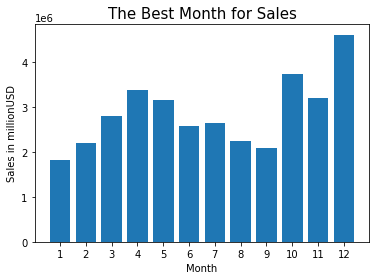

In [107]:
#Plotting the values

months=range(1,13)
plt.bar(months,monthly_sales)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in millionUSD')
plt.title('The Best Month for Sales',size=15)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Ecom data/Best_Month_of_Sales.png')
plt.show()
plt.close()

From the above viz, it canbe seen that December has the most number of sales.

# Which city has the max order?

In [29]:
#We don't have any column name city, so we have to fetch city from the address column

#We create a function for it

def city(x):
  return x.split(',')[1]

In [30]:
#Applying the function

all_data['city']=all_data['Purchase Address'].apply(city)

In [31]:
#Checking our new variable

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco


In [32]:
#Group and count by city

count_city=all_data.groupby('city')['city'].count()
count_city

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

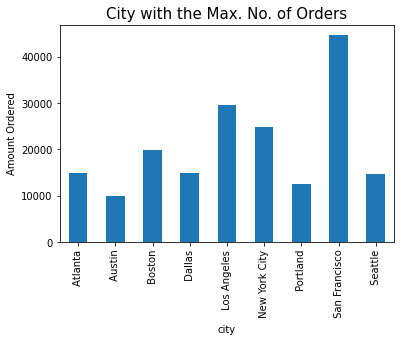

In [106]:
#Ploting the count

count_city.plot.bar()
plt.ylabel('Amount Ordered')
plt.title('City with the Max. No. of Orders', size=15)


plt.savefig('/content/drive/MyDrive/Colab Notebooks/Ecom data/City_max_order.png')
plt.show()
plt.close()

From the above viz, it can be seen that San Francisco has the maximum number of order

## At What time was sales of product maximum?

In [35]:
#Checking the datatype of order date

all_data['Order Date'].dtype

dtype('O')

In [36]:
#We have to convert it to data time and extract the hour

all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0


In [38]:
#Buid an iterator to bring out the needed parameters

keys=[]
hour=[]

for key,hour_df in all_data.groupby('Hour'):
  keys.append(key)
  hour.append(len(hour_df))

In [39]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [40]:
#hour containts the amount of sales for a particular hour

hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

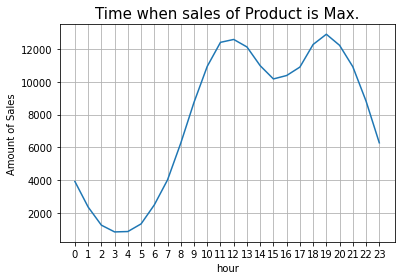

In [105]:
#Plot the values of the variables

plt.grid()

plt.plot(keys,hour)

plt.xlabel('hour')
plt.ylabel('Amount of Sales')
plt.xticks(keys)

plt.title('Time when sales of Product is Max.', size=15)


plt.savefig('/content/drive/MyDrive/Colab Notebooks/Ecom data/Peak_period.png')
plt.show()
plt.close()

From the above viz, it is seen that 12pm and 7pm are the peak period.

## What product sold the most and why?

In [46]:
#We have to group by product

product_sold=all_data.groupby('Product')['Quantity Ordered'].sum()

product_sold

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

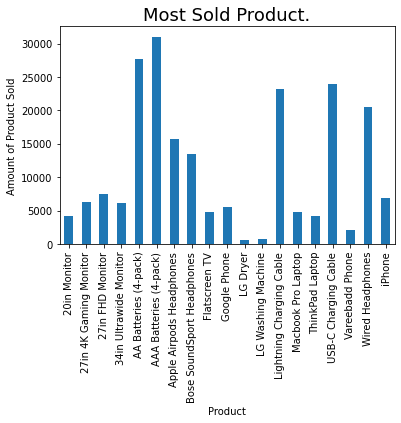

In [104]:
#plotting the result
product_sold.plot(kind='bar')

plt.ylabel('Amount of Product Sold')
plt.title('Most Sold Product.', size=18)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Ecom data/Most_sold_prod.png')
plt.show()
plt.close()

From the above viz, AAA Batteries(4-pack) is the most sold product

In [51]:
#To know why the product is the most sold, we need to know what is the average price of each product.

avg_price = all_data.groupby('Product')['Price Each'].mean()

avg_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [52]:
#Plotting the values

#returning the index of the product sold
prod_index=product_sold.index


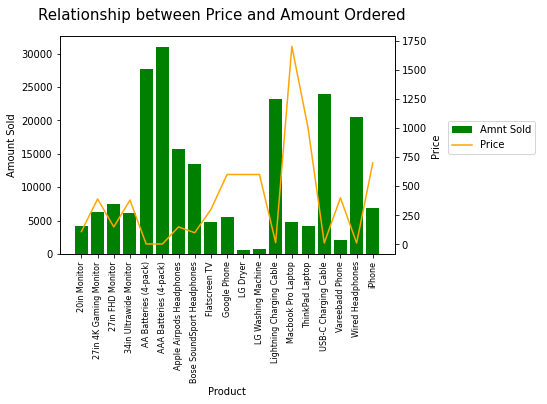

In [103]:
#Using subplots()

fig, ax1=plt.subplots()
ax2=ax1.twinx() 

# Plot data on the first subplot
ax1.bar(prod_index,product_sold,color='g',label='Amnt Sold')

# Plot data on the second subplot
ax2.plot(prod_index,avg_price,color='orange',label='Price')

#Setting the xticks
ax1.set_xticklabels(prod_index,rotation='vertical',size=8)

# Setting the plot label
ax1.set_ylabel('Amount Sold')
ax1.set_xlabel('Product')
ax2.set_ylabel('Price')

# Adding a double legend to the right of the plot
fig.legend(
    loc='upper right',
    bbox_to_anchor=(1.25,1.0)
)

# Adding tittle
fig.suptitle('Relationship between Price and Amount Ordered',size=15)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Ecom data/Amount_sold_vs_Price.png',bbox_inches='tight')
plt.show()
plt.close()

From the above viz, we can see that their seems to be a correllation between quantity ordered and the price of the product. We can see product with high price and has low quantity order.

## What products are most often sold together?

In [77]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0


In [78]:
#Checking order id with duplicate

df=all_data['Order ID'].duplicated(keep=False)

In [79]:
#Passing the result into my dataframe

df2 = all_data[df]

df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2
31,162037,Lightning Charging Cable,1,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles,2


In [80]:
#Group by order id

df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-80-8fc3395f1815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [81]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles,2,"iPhone,Lightning Charging Cable"


In [82]:
#So now we can remove the duplicate

df2=df2.drop_duplicates(subset=['Order ID'])

df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2,"iPhone,Lightning Charging Cable"
60,162066,AA Batteries (4-pack),1,3.84,03/13/19 13:57,"602 Pine St, New York City, NY 10001",3,3.84,New York City,13,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,Vareebadd Phone,1,400.00,03/30/19 20:23,"334 Jackson St, Atlanta, GA 30301",3,400.00,Atlanta,20,"Vareebadd Phone,USB-C Charging Cable"
78,162082,Vareebadd Phone,1,400.00,03/09/19 14:15,"401 Wilson St, New York City, NY 10001",3,400.00,New York City,14,"Vareebadd Phone,Wired Headphones"


In [83]:
#Counting the grouped product

df2['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                     882
Google Phone,USB-C Charging Cable                                   856
iPhone,Wired Headphones                                             361
Vareebadd Phone,USB-C Charging Cable                                312
Google Phone,Wired Headphones                                       303
                                                                   ... 
Vareebadd Phone,Bose SoundSport Headphones,Flatscreen TV              1
LG Washing Machine,Apple Airpods Headphones                           1
Google Phone,Bose SoundSport Headphones,Lightning Charging Cable      1
20in Monitor,iPhone                                                   1
Vareebadd Phone,Lightning Charging Cable                              1
Name: Grouped, Length: 366, dtype: int64

In [84]:
#Let plot the top 5

top_5 =df2['Grouped'].value_counts()[0:5]

top_5

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

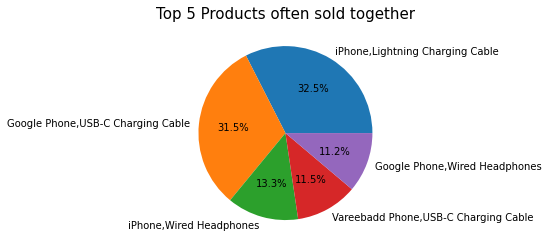

In [101]:
data = top_5
labels=top_5.index

fig, ax=plt.subplots()
ax.pie(data,labels=labels,autopct='%1.1f%%')
ax.set_title('Top 5 Products often sold together', size=15)



plt.savefig('/content/drive/MyDrive/Colab Notebooks/Ecom data/Most_bought_together_items.png',bbox_inches='tight')
plt.show()
plt.close()


From the above viz, it showns that iPhone, Lightning Charging Cable is the most bought together products followed by Google Phone, USB-c Charging Cable. 